# News Mood
***
Observations:

- It would appear from the average compound values of sentiments from each outlet's last 100 tweets (as represented by the bar graph below), that BBC and Fox are putting out more positive tweets, and CBS and CNN are releasing more negative tweets.  However, the polarity values in relation to zero are somewhat small, and therefore really close to neutral all around.
- There is more visible evidence of fluctuation in the positive direction by BBC and Fox, and negative by CBS and CNN, when viewing the analysis of the individual tweets, as shown in the scatter plot below.  But again, there are a substantial amount of offsetting values across the board, resulting in a sort of questionable conclusion.
- The New York Times can be considered the most neutral of the five outlets sampled, as portrayed in both graphs.
- It would be interesting to see this information plotted over a much longer period of time, to see if more definite patterns emerge.

In [1]:
import tweepy
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
plt.style.use('ggplot')

In [2]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [5]:
target_users = ["@bbc", "@cbsnews", "@cnn", "@foxnews", "@nytimes"]
sentiments = []

In [6]:
for target in target_users:
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    
    oldest_tweet=None
    
    counter=1
    
    for x in range (1, 6):
        
        public_tweets = api.user_timeline(target, max_id = oldest_tweet)
        
        for tweet in public_tweets:
            
#             print("Tweet %s: %s" % (counter, tweet["text"]))
    
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            
            oldest_tweet = tweet['id'] - 1
        
            tweet_time=[]
            tweet_date=[]
            raw_time = tweet["created_at"]
            tweet_time.append(raw_time)
            for raw_time in tweet_time:
                tweet_date=datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
            
            sentiments.append({"User": target,
                               "Date": tweet_date,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            sentiment_means={
            "User": target,
            "Compound": np.mean(compound_list),
            "Positive": np.mean(positive_list),
            "Neutral": np.mean(negative_list),
            "Negative": np.mean(neutral_list),
            "Tweet Count": len(compound_list)}
            
            counter += 1
            



In [7]:
news_df = pd.DataFrame.from_dict(sentiments).round(3)
news_df.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,0.000,2018-06-26 21:20:15+00:00,1.000,0.000,0.000,1,@bbc
1,0.000,2018-06-26 19:05:08+00:00,1.000,0.000,0.000,2,@bbc
2,0.296,2018-06-26 18:03:06+00:00,0.792,0.074,0.134,3,@bbc
3,0.000,2018-06-26 17:02:02+00:00,1.000,0.000,0.000,4,@bbc
4,0.000,2018-06-26 16:33:41+00:00,1.000,0.000,0.000,5,@bbc


In [8]:
bbc_df = news_df.loc[news_df["User"] == "@bbc"]
cbs_df = news_df.loc[news_df["User"] == "@cbsnews"]
cnn_df = news_df.loc[news_df["User"] == "@cnn"]
fox_df = news_df.loc[news_df["User"] == "@foxnews"]
nyt_df = news_df.loc[news_df["User"] == "@nytimes"]


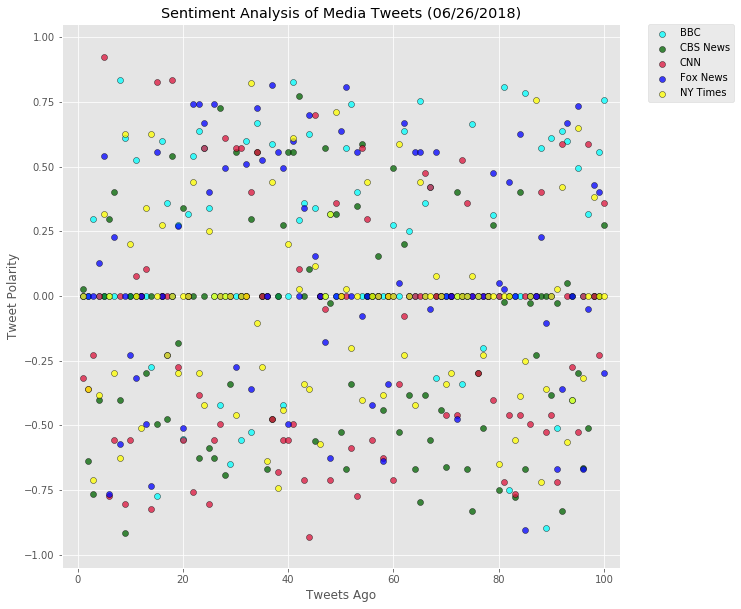

In [9]:
date = datetime.now()
date = date.strftime("%m/%d/%Y")
plt.figure(figsize=(10,10))
plt.scatter(bbc_df["Tweets Ago"], bbc_df["Compound"], c="cyan", alpha=0.75, edgecolors="k", label="BBC")
plt.scatter(cbs_df["Tweets Ago"], cbs_df["Compound"], c="darkgreen", alpha=0.75, edgecolors="k", label="CBS News")
plt.scatter(cnn_df["Tweets Ago"], cnn_df["Compound"], c="crimson", alpha=0.75, edgecolors="k", label="CNN")
plt.scatter(fox_df["Tweets Ago"], fox_df["Compound"], c="blue", alpha=0.75, edgecolors="k", label="Fox News")
plt.scatter(nyt_df["Tweets Ago"], nyt_df["Compound"], c="yellow", alpha=0.75, edgecolors="k", label="NY Times")
plt.xlim(-3, 103)
plt.ylim(-1.05, 1.05)
plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [10]:
bbc_mean=np.mean(bbc_df["Compound"])
cbs_mean=np.mean(cbs_df["Compound"])
cnn_mean=np.mean(cnn_df["Compound"])
fox_mean=np.mean(fox_df["Compound"])
nyt_mean=np.mean(nyt_df["Compound"])

In [11]:
bar_df=pd.DataFrame({"Users": ["BBC", "CBS", "CNN", "FOX", "NYT"],
        "Mean Sentiments": [bbc_mean, cbs_mean, cnn_mean, fox_mean, nyt_mean]}).round(3)
bar_df

,Mean Sentiments,Users
0,0.145,BBC
1,-0.130,CBS
2,-0.125,CNN
3,0.086,FOX
4,-0.046,NYT


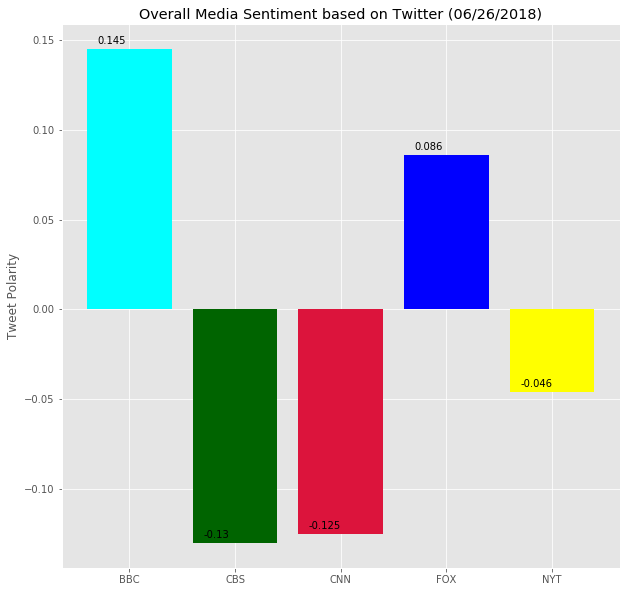

In [12]:
# colors=["cyan", "darkgreen", "crimson", "blue", "yellow"]
plt.figure(figsize=(10,10))
plt.bar(bar_df["Users"], bar_df["Mean Sentiments"], color=["cyan", "darkgreen", "crimson", "blue", "yellow"])
plt.title(f"Overall Media Sentiment based on Twitter ({date})")
plt.ylabel("Tweet Polarity")
for i, v in enumerate(bar_df["Mean Sentiments"]):
    plt.text(i-.3, v+.003, str(v).format(), color='black')
plt.show()